In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LinearR 

In [4]:
data = pd.read_csv('Extended Data Fig. 1 obs-mod-1990-2014 (250306).csv')
data = data[data['t']<295]

In [6]:
data

,t,year,month,longitude,latitude,loc,obs,UKESM1_0_LL
0,1,1990,1,11.0,79.0,11079.0,25.75,21.84
1,1,1990,1,-157.0,71.0,-156929.0,23.58,7.35
2,1,1990,1,29.0,67.0,29067.0,17.65,14.14
3,1,1990,1,13.0,65.0,13065.0,21.77,18.67
4,1,1990,1,19.0,65.0,19065.0,19.23,16.63
...,...,...,...,...,...,...,...,...
113269,294,2014,6,125.0,43.0,125043.0,30.01,41.79
113270,294,2014,6,125.0,47.0,125047.0,29.62,42.02
113271,294,2014,6,127.0,43.0,127043.0,31.54,36.19
113272,294,2014,6,127.0,45.0,127045.0,30.03,38.19


In [7]:
obs_mean = data['obs'].mean()
mod_mean = data['UKESM1_0_LL'].mean()

print("observation mean: "+str(np.round(obs_mean,1))+" ppb")
print("model mean: "+str(np.round(mod_mean,1))+" ppb")
print("model-observation bias: "+str(np.round(mod_mean - obs_mean, 1))+" ppb")

observation mean: 27.5 ppb
model mean: 27.8 ppb
model-observation bias: 0.3 ppb


### Calculate the grid-specific observation-simualtion synchronicity 

In [8]:
grid_corr = data.groupby('loc').apply(lambda g: g['obs'].corr(g['UKESM1_0_LL']))

grid_coord = data.groupby('loc').mean()[['longitude','latitude']]
grid_coord['corr'] = np.abs(grid_corr)
print("model-observation synchronicity: "+str(np.round(grid_coord['corr'].median(),2)))

model-observation synchronicity: 0.86


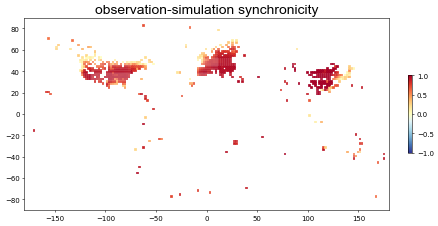

In [9]:
temp = grid_coord

plt.figure(num=None, figsize=(10, 5), dpi=50, facecolor='w', edgecolor='k')
cm = plt.cm.get_cmap('RdYlBu_r')
x = temp['longitude']
y = temp['latitude']

plt.title('observation-simulation synchronicity', fontsize = 20, fontname = "Arial", color = "black")
z = (temp['corr'])
sc = plt.scatter(x, y, c=z, marker="s", s=5, vmin=-1,vmax=1, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(fraction=0.01)

### Calculate the grid-specific observation-simualtion bias

In [10]:
data['bias'] = data['obs'] - data['UKESM1_0_LL']
data['nmb'] = data['bias']/data['obs']
grid_bias = data.groupby('loc').median()[['bias']]
grid_nmb = data.groupby('loc').median()[['nmb']]

grid_coord['bias'] = grid_bias
grid_coord['nmb'] = grid_nmb

print("model-observation mean bias: "+str(np.round(grid_coord['bias'].median(), 2)))
print("model-observation normalised mean bias: "+str(np.round(grid_coord['nmb'].median(), 2)))

model-observation mean bias: -0.36
model-observation normalised mean bias: -0.01


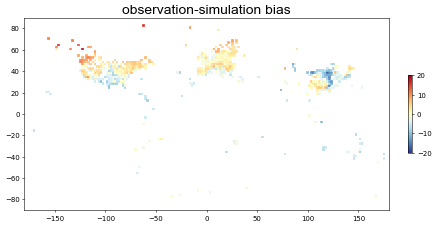

In [11]:
temp = grid_coord

plt.figure(num=None, figsize=(10, 5), dpi=50, facecolor='w', edgecolor='k')
cm = plt.cm.get_cmap('RdYlBu_r')
x = temp['longitude']
y = temp['latitude']

plt.title('observation-simulation bias', fontsize = 20, fontname = "Arial", color = "black")
z = temp['bias']
sc = plt.scatter(x, y, c=z, marker="s", s=5, vmin=-20, vmax=20, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(fraction=0.01)

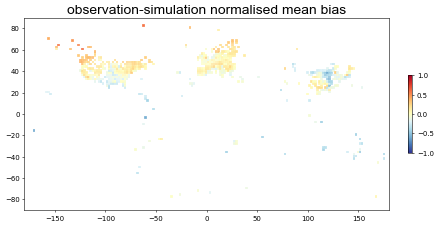

In [12]:
temp = grid_coord

plt.figure(num=None, figsize=(10, 5), dpi=50, facecolor='w', edgecolor='k')
cm = plt.cm.get_cmap('RdYlBu_r')
x = temp['longitude']
y = temp['latitude']

plt.title('observation-simulation normalised mean bias', fontsize = 20, fontname = "Arial", color = "black")
z = temp['nmb']
sc = plt.scatter(x, y, c=z, marker="s", s=5, vmin=-1,vmax=1, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(fraction=0.01)

### Error decomposition

In [13]:
obs_mean = data.groupby('loc').mean()[['obs']]
obs_std = data.groupby('loc').std()[['obs']]

mod_mean = data.groupby('loc').mean()[['UKESM1_0_LL']]
mod_std = data.groupby('loc').std()[['UKESM1_0_LL']]

In [14]:
grid_coord['obs_mean'] = obs_mean
grid_coord['obs_std'] = obs_std
grid_coord['mod_mean'] = mod_mean
grid_coord['mod_std'] = mod_std

In [15]:
grid_coord['bias2'] = grid_coord['bias']*grid_coord['bias']
grid_coord['variance'] = (grid_coord['mod_std'] - grid_coord['corr']*grid_coord['obs_std'])**2
grid_coord['noise2'] = grid_coord['obs_std']**2*(1-grid_coord['corr']**2)

grid_coord['dev'] = grid_coord['mod_std'] - grid_coord['corr']*grid_coord['obs_std']
grid_coord['noise'] = np.sqrt(grid_coord['noise2'])

In [16]:
print("model-observation irreducible noise: "+str(np.round(grid_coord['noise'].median(),1))+" ppb")

model-observation irreducible noise: 2.2 ppb


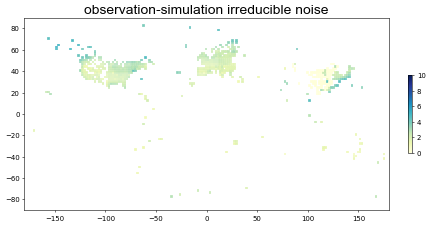

In [20]:
temp = grid_coord

plt.figure(num=None, figsize=(10, 5), dpi=50, facecolor='w', edgecolor='k')
cm = plt.cm.get_cmap('YlGnBu')
x = temp['longitude']
y = temp['latitude']

plt.title('observation-simulation irreducible noise', fontsize = 20, fontname = "Arial", color = "black")
z = (temp['noise'])
sc = plt.scatter(x, y, c=z, marker="s", s=5, vmin=0,vmax=10, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(fraction=0.01)

### Spatial averaged model-observation bias 

### Export the analysis results (for external geomapping)

In [21]:
grid_coord

,longitude,latitude,corr,bias,nmb,obs_mean,obs_std,mod_mean,mod_std,bias2,variance,noise2,dev,noise
loc,,,,,,,,,,,,,,
-171015.0,-171.0,-15.0,0.894412,-7.570,-0.610345,13.117623,3.537783,20.938075,5.004750,57.304900,3.387500,2.503531,1.840516,1.582255
-158979.0,-159.0,21.0,0.801279,-5.470,-0.191788,26.177353,4.113360,31.169118,4.561905,29.920900,1.602646,6.056453,1.265957,2.460986
-156979.0,-157.0,21.0,0.774770,-4.990,-0.194274,25.488385,4.198515,30.882955,5.412230,24.900100,4.662777,7.046283,2.159347,2.654483
-156929.0,-157.0,71.0,0.584156,10.890,0.399470,23.799762,5.463113,17.235136,8.640885,118.592100,29.697844,19.661136,5.449573,4.434088
-154981.0,-155.0,19.0,0.678349,-5.665,-0.264997,23.394808,4.027479,29.137981,5.384449,32.092225,7.035285,8.756557,2.652411,2.959148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153025.0,153.0,25.0,0.883260,-3.820,-0.164744,24.674249,7.534844,29.036867,8.083878,14.592400,2.041055,12.481878,1.428655,3.532970
166923.0,167.0,-77.0,0.604097,1.265,0.068263,17.260354,3.343192,16.056681,1.722210,1.600225,0.088449,7.098092,-0.297404,2.664224
168955.0,169.0,-45.0,0.653151,-0.990,-0.055212,17.060990,3.287132,17.594257,1.785214,0.980100,0.130884,6.195656,-0.361780,2.489107


In [22]:
grid_coord.to_csv('Extended Data Fig. 1 obs-mod-evaluation-decomposition.csv', index=False)